**Context:** 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

**Objective:**

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

- Explore the dataset and extract insights using Exploratory Data Analysis.
- Do the users spend more time on the new landing page than the old landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
- Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

**Data Dictionary:**

- user_id - This represents the user ID of the person visiting the website.
- group - This represents whether the user belongs to the first group (control) or the second group (treatment).
- landing_page - This represents whether the landing page is new or old.
- time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
- converted - This represents whether the user gets converted or not.
- language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

# Loading the data and exploring it

In [2]:
df=pd.read_csv("abtest.csv") # Loads data from the csv file into a pandas data frame

enews=df.copy() # makes a copy of the data to avoid unintended changes to the original dataset


enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
enews.shape #gets the number of rows and columns in the data

(100, 6)

In [4]:
enews.info() #gives the data types, columns and their counts...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
#Converts the different columns to the preferred data types. Saves on space too.

enews["group"]=enews["group"].astype("category")
enews["landing_page"]=enews["landing_page"].astype("category")
enews["converted"]=enews["converted"].astype("category")
enews["language_preferred"]=enews["language_preferred"].astype("category")
enews["user_id"]=enews["user_id"].astype("object")

enews=enews.drop("user_id",axis=1) #drops the user_id column which does not give us any useful insights going forward.

enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.7 KB


In [6]:
enews.describe(include='all') # provides a summary of the data

,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100,100,100.000000,100,100
unique,2,2,NaN,2,3
top,treatment,old,NaN,yes,Spanish
freq,50,50,NaN,55,34
mean,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,7.022500,NaN,NaN


In [7]:
enews.isnull().sum() #checks for any missing values in the columns in the data frame.

group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Insights**
- The dataframe has 100 rows and 6 columns, and there are no missing values in the columns.
- After dropping user_id, the remaining columns have the 'category' data type, apart from the time_spent_on_the_page column which has the 'float' data type.
- The data summary indicates that the mean time spent on a page is ~5.38, with a standard deviation of ~2.39. The least amount of time spent on a page and the most is ~0.19 and ~10.71 respectively. This could be indicative of outliers in the data that are influencing the results.
- The summary shows that there were more conversions (55-yes) than non-conversions.
- Spanish is also the preferred language for many of the users (34) in comparison to English and French.

# EDA and Visualizations

**Checking the distribution of the time factor**

C:\Users\teddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


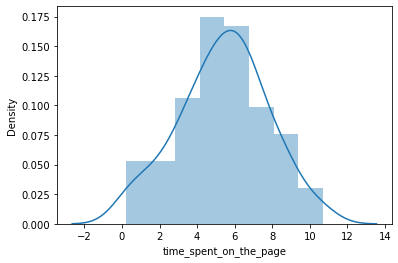

In [8]:
sns.distplot(enews["time_spent_on_the_page"])

**Checking the 'conversion' and 'language' counts** 

C:\Users\teddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


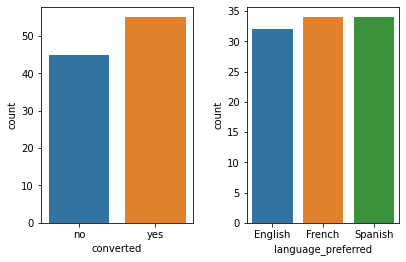

In [9]:
plt.subplot(1,2,1)
sns.countplot(enews["converted"])
plt.subplot(1,2,2)
sns.countplot(enews["language_preferred"])
plt.tight_layout(pad=2.0)
plt.show()

In [10]:
enews["language_preferred"].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Checking conversion against language,group, and page**

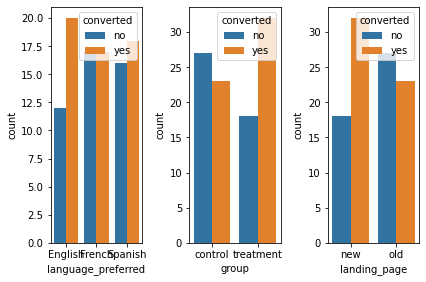

In [11]:
plt.subplot(1,3,1)
#Add titles......
sns.countplot(enews["language_preferred"], hue=enews["converted"])
plt.subplot(1,3,2)
sns.countplot(enews["group"], hue=enews["converted"])
plt.subplot(1,3,3)
sns.countplot(enews["landing_page"], hue=enews["converted"])

plt.tight_layout(pad=1.0)

plt.show()

**Insights**
- The time spent on the pages appears to be normally distributed, indicating that the sample is normally distributed as well.
- The 'converted' visualization further confirms the earlier observation that there are more successful conversions that failed ones.
- Additionally one can now see that French and Spanish have equal preference, while English is slightly less preferred.
- However, English has the most conversion, followed by Spanish then finally french which has an equal number 'yes' and 'no' conversions.
- The countplots also reveal that the treatment group(new page) has more succeful conversions than the control group (old page). Additionally, the control group had more failed conversions than the treatment group.
- One also notices that the old landing page had more successful conversions than the old page. The old page, additionally, had more failed conversions than the new page.

# Individual group stats

In [12]:
treat = enews[enews["group"]=="treatment"] #creates a dataframe with just the treatment group
treat.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
4,treatment,new,4.75,yes,Spanish
6,treatment,new,5.25,yes,French
8,treatment,new,10.71,yes,French


In [13]:
treat.describe(include='all')

,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50,50,50.000000,50,50
unique,1,1,NaN,2,3
top,treatment,new,NaN,yes,Spanish
freq,50,50,NaN,32,17
mean,NaN,NaN,6.223200,NaN,NaN
std,NaN,NaN,1.817031,NaN,NaN
min,NaN,NaN,1.650000,NaN,NaN
25%,NaN,NaN,5.175000,NaN,NaN
50%,NaN,NaN,6.105000,NaN,NaN
75%,NaN,NaN,7.160000,NaN,NaN


C:\Users\teddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


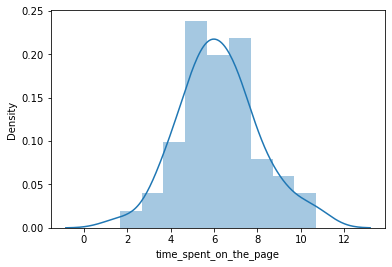

In [14]:
sns.distplot(treat["time_spent_on_the_page"])

**Observations**
- The treatment group has more successful conversions (32) than failed ones.
- Spanish is also the most preferred language for this group.
- The mean time spent on the page is ~6.22 and the std dev is ~1.82
- A relative normal distribution is still maintained.

In [15]:
cont=enews[enews["group"]=="control"]
cont.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,yes,Spanish
3,control,old,3.02,no,French
5,control,old,5.28,yes,English
7,control,old,6.53,yes,Spanish
9,control,old,2.08,no,English


In [16]:
cont.describe(include='all')

,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50,50,50.000000,50,50
unique,1,1,NaN,2,3
top,control,old,NaN,no,Spanish
freq,50,50,NaN,27,17
mean,NaN,NaN,4.532400,NaN,NaN
std,NaN,NaN,2.581975,NaN,NaN
min,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,2.720000,NaN,NaN
50%,NaN,NaN,4.380000,NaN,NaN
75%,NaN,NaN,6.442500,NaN,NaN


C:\Users\teddy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


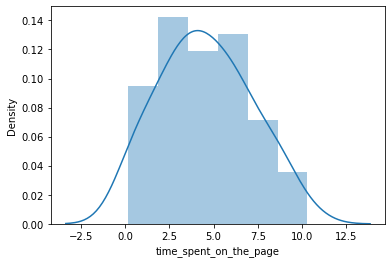

In [17]:
sns.distplot(cont["time_spent_on_the_page"])

**Observation**
- The treatment group has more failed conversions (27) than successful ones.
- Spanish is also the most preferred language for this group.
- The mean time spent on the page is ~4.53 and the std dev is ~2.58
- A relative normal distribution is still maintained.

# Hypothesis testing

### Do the users spend more time on the new landing page than the old landing page?


Test to be done = Two independent sample T-test for equality of means

**Null and alternative hypothesis**


Let $\mu_1, \mu_2$ be the mean time spent on **new page** and **old page** respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

**T-test assumptions are satisfied or not?**

* Continuous data - Yes, time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


In [18]:
#import the required function
#Population std dev is unknown
from scipy.stats import ttest_ind

# find the p-value
test_stat1, p_value = ttest_ind(treat['time_spent_on_the_page'], cont['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


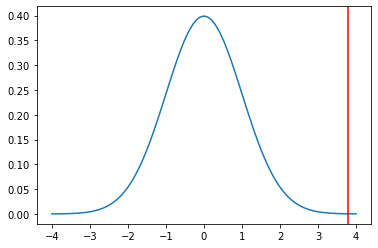

In [19]:
from scipy.stats import norm

x=np.linspace(-4,4, 100)  # plotting the test statistic
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=test_stat1, c= 'r');

**Insight**

- The p-value is much less than the level of significance 0.05, therefore, we reject the null hypothesis. Thus, there is enough statistical evidence to say that users spend more time on the new landing page than the old one.


### Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Null and alternative hypothesis**


Let $p_1,p_2$ be the proportions of conversions in new landing page and old landing page respectively.

Test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

In [20]:
treat["converted"].value_counts() #yes = 32
cont["converted"].value_counts() #yes=23

no     27
yes    23
Name: converted, dtype: int64

**Z-test assumptions are satisfied or not?**

*   Binomally distributed population - Yes, converted or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 
>$np_1 = 50\cdot \frac{32}{50} =32 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-32}{50} =18 \geq 10 \\
np_2 = 50\cdot \frac{23}{50} =23 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-23}{50} =27 \geq 10 $


In [21]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the conversion counts
yes_count = np.array([32, 23])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat2, p_value = proportions_ztest(yes_count, nobs)
p_value

0.07044042927208799

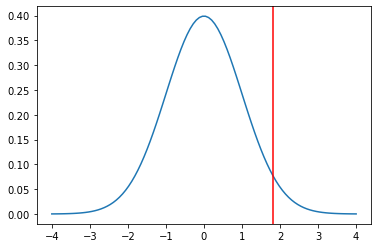

In [22]:
from scipy.stats import norm

x=np.linspace(-4,4, 100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=test_stat2, c= 'r');

**Insight**

Since the p-value is larger that .05 at the .05 significance level, we fail to reject the null hypothesis. That means, there isn't enough statistical evidence that the conversion rate in the new page is greater than that of the old page, or vice versa. Therefore, we work with the presumption that the conversion rates are the same in both pages.

### Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

In [23]:
langcon_cont=pd.crosstab(enews["converted"], enews["language_preferred"])  #This creates the crosstab.
langcon_cont

language_preferred,English,French,Spanish
converted,,,
no,12,17,16
yes,20,17,18


**Null and alternative hypothesis**


We will test the null hypothesis

>$H_0:$ Conversion is dependent is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

**Test whether the assumptions are satisfied or not?**

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [24]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(langcon_cont)
p_value

0.5686624745121615

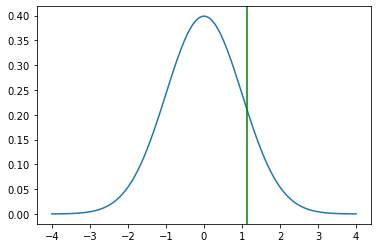

In [25]:
x=np.linspace(-4,4, 100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=chi, c= 'g')
x1=np.linspace(chi, 4, 50)

P_value is greater than the .05 significance level, therefore we fail to reject the fail to reject the null hypothesis. Hence, there is enough statistical evidence to conclude that the conversion rate is independent on the preferred language.

In [26]:
langcont_cont=pd.crosstab(cont["converted"], cont["language_preferred"])
langtreat_cont=pd.crosstab(treat["converted"], treat["language_preferred"])

chi, p_value, dof, expected = chi2_contingency(langcont_cont)
p_value

0.033422859291275225

In [27]:
chi, p_value, dof, expected = chi2_contingency(langtreat_cont)
p_value

0.41431023888627927

- The latter findings indicate for the control group, conversion is dependent on the preferred language, with a significance of ~0.03, whereas conversion is not dependent on the preferred language for the treatment group, with a p-value of ~0.41.

### Is the mean time spent on the new page same for the different language users?

Test needed = ANOVA

**Null and alternative hypothesis**

Let $\mu_1, \mu_2, \mu_3$ be the mean time spent on the page for English, French, and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one period spent on the page is different from the rest.


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


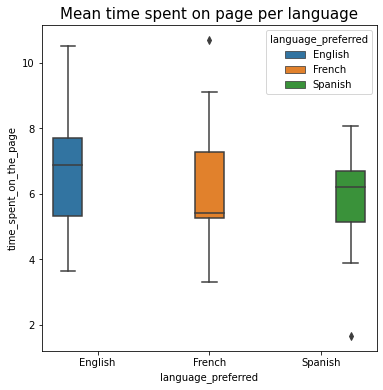

In [28]:
# mean time spent on the new page by the different languages
print(treat.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = "time_spent_on_the_page" , data = treat, hue = 'language_preferred')
a.set_title("Mean time spent on page per language", fontsize=15)
plt.show()

**Check for normality and equality of variance**

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution.

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution.

In [29]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(enews['time_spent_on_the_page']) 
p_value

0.5643684267997742

- With a p_value of ~0.56, we fail to reject the null hypothesis that the response follows the normal distribution because the value is higher than .05, the significance level.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [30]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( enews['time_spent_on_the_page'][enews['language_preferred']=="English"], 
                                   enews['time_spent_on_the_page'][enews['language_preferred']=="French"], 
                                   enews['time_spent_on_the_page'][enews['language_preferred']=="Spanish"])
p_value

0.06515086840327314

- The p-value is approaching significance, but since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

In [31]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat3, p_value = f_oneway(treat.loc[treat['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              treat.loc[treat['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              treat.loc[treat['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
p_value

0.43204138694325955

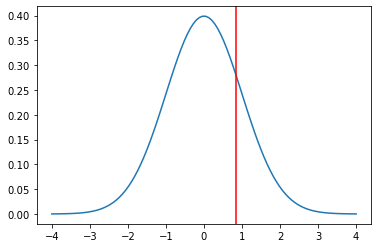

In [33]:
x=np.linspace(-4,4, 100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=test_stat3, c= 'r')
x1=np.linspace(test_stat3, 4, 50)

The p-value is greater than the .05 significance level. We, therefore, fail to reject the null hypothesis, and conclude that the mean times spent on the new page is not different for the preferred languages.

### Insights and Recommendations

- The results from the different calculations reveal that there are more successful conversions than failed ones.
- The results also indicate that the conversion rates do not depend on the language preferred by the users. Additionally, the amount of time spent on the page is independent of the language.
- However, attention needs to be given to users of the old page, whose conversion rate is dependent on the language.
- The conversion rate is also not dependent on the page, but there seems to be an affinity for the new page.

- Hence, the company should keep on improving on the feature, to increase the conversion rate. Additionally, the company should check what language is more appealing for more successful conversions in the old page and incorporate that into the new page. 




# ---------------------------------------------**The End**-------------------------------------------------